# ¡Hola, Yair!  

Mi nombre es Carlos Ortiz, soy code reviewer de TripleTen y voy a revisar el proyecto que acabas de desarrollar.

Cuando vea un error la primera vez, lo señalaré. Deberás encontrarlo y arreglarlo. La intención es que te prepares para un espacio real de trabajo. En un trabajo, el líder de tu equipo hará lo mismo. Si no puedes solucionar el error, te daré más información en la próxima ocasión. 

Encontrarás mis comentarios más abajo - **por favor, no los muevas, no los modifiques ni los borres**.

¿Cómo lo voy a hacer? Voy a leer detenidamente cada una de las implementaciones que has llevado a cabo para cumplir con lo solicitado. Verás los comentarios de esta forma:

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
Si todo está perfecto.
</div>


<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
Si tu código está bien pero se puede mejorar o hay algún detalle que le hace falta.
</div>


<div class="alert alert-block alert-danger">
    
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
    
Si de pronto hace falta algo o existe algún problema con tu código o conclusiones.
</div>


Puedes responderme de esta forma: 


<div class="alert alert-block alert-info">
<b>Respuesta del estudiante</b> <a class="tocSkip"></a>
</div>
¡Empecemos!

# Tomar decisiones de negocio basadas en datos

esta sera una simulacion de trabajo en una empresa emergente que vende productos alimenticios. Se debe investigar el comportamiento del usuario para la aplicación de la empresa.
Primero, hacer el embudo de ventas. Para descubrir cómo los usuarios y las usuarias llegan a la etapa de compra. ¿Cuántos usuarios o usuarias realmente llegan a esta etapa? ¿Cuántos se atascan en etapas anteriores? ¿Qué etapas en particular?
Luego, observar los resultados de un test A/A/B. Al equipo de diseño le gustaría cambiar las fuentes de toda la aplicación, pero la gerencia teme que los usuarios y las usuarias piensen que el nuevo diseño es intimidante. Por ello, deciden tomar una decisión basada en los resultados de un test A/A/B.
Los usuarios se dividen en tres grupos: dos grupos de control obtienen las fuentes antiguas y un grupo de prueba obtiene las nuevas.

## Paso 1. Abrir el archivo de datos y leer la información general

In [1]:
#importar librerias
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind
from statsmodels.stats.proportion import proportions_ztest

In [2]:
#leer el datafrma
data=pd.read_csv('/datasets/logs_exp_us.csv',sep=r'\t',)
data.info()

/tmp/ipykernel_83/3555145803.py:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  data=pd.read_csv('/datasets/logs_exp_us.csv',sep=r'\t',)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244126 entries, 0 to 244125
Data columns (total 4 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   EventName       244126 non-null  object
 1   DeviceIDHash    244126 non-null  int64 
 2   EventTimestamp  244126 non-null  int64 
 3   ExpId           244126 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 7.5+ MB


<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
Buen trabajo con la importación de datos y de librerías. Puedes prescindir de la `r` antes del tabulador. No es necesaria.
</div>

por lo visto no hay datos ausentes en el dataframe

## Paso 2. Preparar los datos para el análisis

### Cambia el nombre de las columnas de manera que sea conveniente para ti

In [3]:
data.columns=['name','user_id','time','experiment']

### Comprueba si hay tipos de datos y valores ausentes. Corrige los datos si es necesario

In [4]:
#convertir el tiempo a un date time
data['date_time']=pd.to_datetime(data['time'],unit='s')
#convertir la columna experiment a category
data['experiment']=data['experiment'].astype('category')
data.info()
#buscar duplicados en los experimentos 
experimentos_por_usuario = data.groupby('user_id')['experiment'].nunique()
usuarios_en_dos_o_tres_experimentos = experimentos_por_usuario[experimentos_por_usuario >= 2].index.tolist()
dupli_resultado = data[data['user_id'].isin(usuarios_en_dos_o_tres_experimentos)]
dupli_resultado

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244126 entries, 0 to 244125
Data columns (total 5 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   name        244126 non-null  object        
 1   user_id     244126 non-null  int64         
 2   time        244126 non-null  int64         
 3   experiment  244126 non-null  category      
 4   date_time   244126 non-null  datetime64[ns]
dtypes: category(1), datetime64[ns](1), int64(2), object(1)
memory usage: 7.7+ MB


,name,user_id,time,experiment,date_time


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
Buen trabajo.
</div>

### Agrega una columna de fecha y hora y una columna separada para las fechas

In [5]:
# Agregar una columna separada para las fechas
data['date'] = data['date_time'].dt.date
#transformar a datetime
data['date']= pd.to_datetime(data['date'])

## Paso 3. Estudiar y comprobar los datos

### ¿Cuántos eventos hay en los registros?

In [6]:
data['name'].nunique()

5

hay 5 eventos unicos

### ¿Cuántos usuarios y usuarias hay en los registros?

In [7]:
data['user_id'].nunique()

7551

hay 7551 usuarios en los registros

### ¿Cuál es el promedio de eventos por usuario?

In [8]:
print(data.groupby('user_id')['name'].count().mean())

32.33028737915508


hay un promedio de 32 eventos por usuario

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
Muy buen trabajo en esta primera parte.
</div>

### ¿Qué periodo de tiempo cubren los datos? Encuentra la fecha máxima y mínima. Traza un histograma por fecha y hora. ¿Puedes tener seguridad de que tienes datos igualmente completos para todo el periodo? Los eventos más antiguos podrían terminar en los registros de algunos usuarios o usuarias por razones técnicas y esto podría sesgar el panorama general. Encuentra el momento en el que los datos comienzan a estar completos e ignora la sección anterior. ¿Qué periodo representan realmente los datos?

In [9]:
data['date_time'].describe()

/tmp/ipykernel_83/2238337016.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  data['date_time'].describe()


count                  244126
unique                 176654
top       2019-08-04 16:23:19
freq                        9
first     2019-07-25 04:43:36
last      2019-08-07 21:15:17
Name: date_time, dtype: object

la fecha maxima es 2019-08-07 y la minima es  2019-07-25

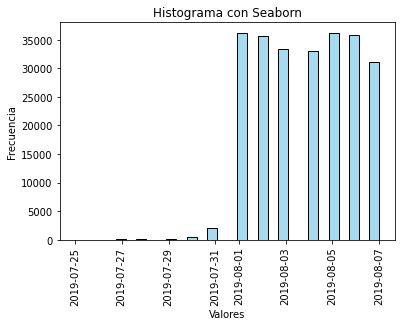

In [10]:
# Trazar un histograma con Seaborn
sns.histplot(data['date'], bins=30, kde=False, color='skyblue')

# Añadir etiquetas y título
plt.xlabel('Valores')
plt.ylabel('Frecuencia')
plt.title('Histograma con Seaborn')
plt.xticks(rotation=90)
# Mostrar el histograma
plt.show()

a partir de la fecha 2019_08_11 obtendremos resultados mas relevantes para nuestro estudio

In [11]:
df=data[data['date']>='2019-08-01']
df

,name,user_id,time,experiment,date_time,date
2828,Tutorial,3737462046622621720,1564618048,246,2019-08-01 00:07:28,2019-08-01
2829,MainScreenAppear,3737462046622621720,1564618080,246,2019-08-01 00:08:00,2019-08-01
2830,MainScreenAppear,3737462046622621720,1564618135,246,2019-08-01 00:08:55,2019-08-01
2831,OffersScreenAppear,3737462046622621720,1564618138,246,2019-08-01 00:08:58,2019-08-01
2832,MainScreenAppear,1433840883824088890,1564618139,247,2019-08-01 00:08:59,2019-08-01
...,...,...,...,...,...,...
244121,MainScreenAppear,4599628364049201812,1565212345,247,2019-08-07 21:12:25,2019-08-07
244122,MainScreenAppear,5849806612437486590,1565212439,246,2019-08-07 21:13:59,2019-08-07
244123,MainScreenAppear,5746969938801999050,1565212483,246,2019-08-07 21:14:43,2019-08-07
244124,MainScreenAppear,5746969938801999050,1565212498,246,2019-08-07 21:14:58,2019-08-07


### Perdiste muchos eventos y usuarios al excluir los datos más antiguos?

segun el histograma no se perdieron una cantidad significativa de datos, y considerando los numeros ahora hay 241298 rows y antes habia 244126 rows por lo que solo se perdio 2828 ros

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
Bien hecho.
</div>

### Asegúrate de tener usuarios y usuarias de los tres grupos experimentales.

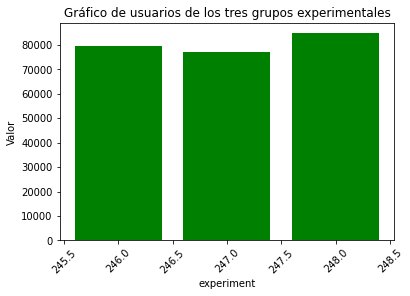

In [12]:
#contar los usuarios de cada experiment
trhee_experiment=df.groupby('experiment')['user_id'].count()
plt.bar(trhee_experiment.index,trhee_experiment.values,color='green')

# Rotar los nombres de los ejes x
plt.xticks(rotation=45)

# Añadir etiquetas y título
plt.xlabel('experiment')
plt.ylabel('Valor')
plt.title('Gráfico de usuarios de los tres grupos experimentales')

# Mostrar el gráfico de barras
plt.show()


segun el grafico confirmo que aun tengo datos de los tres grupos de experimentos

## Paso 4. Estudiar el embudo de eventos

### Observa qué eventos hay en los registros y su frecuencia de suceso. Ordénalos por frecuencia.

In [13]:
df['name'].unique()


array(['Tutorial', 'MainScreenAppear', 'OffersScreenAppear',
       'CartScreenAppear', 'PaymentScreenSuccessful'], dtype=object)

por lo visto hay  5 eventos empezando por el 
-Tutorial
-MainScreenAppear
-OffersScreenAppear
-CartScreenAppear
-PaymentScreenSuccessful

In [14]:
frecuency_event=df.groupby('name').count()
frecuency_event['user_id'].sort_values(ascending=False)

name
MainScreenAppear           117431
OffersScreenAppear          46350
CartScreenAppear            42365
PaymentScreenSuccessful     34113
Tutorial                     1039
Name: user_id, dtype: int64

la evento con mayor frecuencia es MainScreenAppear 

### Encuentra la cantidad de usuarios que realizaron cada una de estas acciones. Ordena los eventos por el número de usuarios. Calcula la proporción de usuarios que realizaron la acción al menos una vez.

In [15]:
user_frecuency=df.groupby('name')['user_id'].nunique()
user_frecuency.sort_values(ascending=False)


name
MainScreenAppear           7419
OffersScreenAppear         4593
CartScreenAppear           3734
PaymentScreenSuccessful    3539
Tutorial                    840
Name: user_id, dtype: int64

7419 usuarios realizaron la accion MainScreenAppear

In [16]:
#calcular la proporcion de usuarios que realizaron la accion una vez 
all_user=df['user_id'].nunique()
usuarios_con_accion = df[df['name'] == 'MainScreenAppear']['user_id'].nunique()
proporcion = usuarios_con_accion / all_user
proporcion

0.9847358640828245

al rededor del 98% de los usarios por lo menos realiza una accion

### ¿En qué orden crees que ocurrieron las acciones? ¿Todas son parte de una sola secuencia? No es necesario tenerlas en cuenta al calcular el embudo.

el orden seria : MainScreenAppear -OffersScreenAppear -CartScreenAppear -PaymentScreenSuccessful

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
Buen trabajo. Lo mejor será prescindir del evento `Tutorial`. 
</div>

### Utiliza el embudo de eventos para encontrar la proporción de usuarios y usuarias que pasan de una etapa a la siguiente. (Por ejemplo, para la secuencia de eventos A → B → C, calcula la proporción de usuarios en la etapa B a la cantidad de usuarios en la etapa A y la proporción de usuarios en la etapa C a la cantidad en la etapa B).

In [17]:
pivot=df.pivot_table(index='user_id',
                    columns='name',
                    values='date_time',
                    aggfunc='min')
step_1 = ~pivot['MainScreenAppear'].isna()
step_2 = step_1 & (pivot['OffersScreenAppear'] > pivot['MainScreenAppear'])
step_3 = step_2 & (pivot['CartScreenAppear'] > pivot['OffersScreenAppear'])
step_4 = step_3 & (pivot['PaymentScreenSuccessful'] > pivot['CartScreenAppear'])

n_mainscreenappear = pivot[step_1].shape[0]
n_offersscreenappear = pivot[step_2].shape[0]
n_cartscreenappear = pivot[step_3].shape[0]
n_payment = pivot[step_4].shape[0]
print('MainScreenAppear:', n_mainscreenappear)
print('OffersScreenAppear:', n_offersscreenappear)
print('CartScreenAppear:', n_cartscreenappear)
print('PaymentScreenSuccessful:', n_payment) 


MainScreenAppear: 7419
OffersScreenAppear: 4201
CartScreenAppear: 1767
PaymentScreenSuccessful: 454


### ¿En qué etapa pierdes más usuarios y usuarias?

In [18]:
step1=n_offersscreenappear/n_mainscreenappear
step2=n_cartscreenappear/n_offersscreenappear
step3=n_payment/n_cartscreenappear
print(step1)
print(step2)
print(step3)

0.5662488205957676
0.42061413949059745
0.2569326542161856


se pierden mas usuarios en el ultimo paso cuando los usuarios pasan de la cart screen appear a payment screen successful

### ¿Qué porcentaje de usuarios y usuarias hace todo el viaje desde su primer evento hasta el pago?

In [19]:
all_way=n_payment/n_mainscreenappear
all_way

0.06119423102844049

todo el viaje es hecho por el 6.11 % de los usuarios

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
Excelente.
</div>

## Paso 5. Estudiar los resultados del experimento

### ¿Cuántos usuarios y usuarias hay en cada grupo?

In [20]:
experiment_246=df[df['experiment']==246]['user_id'].nunique()
experiment_247=df[df['experiment']==247]['user_id'].nunique()
experiment_248=df[df['experiment']==248]['user_id'].nunique()
print(f'usuarios del grupo 246:{experiment_246}')
print(f'usuarios del grupo 247:{experiment_247}')
print(f'usuarios del grupo 248:{experiment_248}')

usuarios del grupo 246:2484
usuarios del grupo 247:2513
usuarios del grupo 248:2537


### Tenemos dos grupos de control en el test A/A, donde comprobamos nuestros mecanismos y cálculos. Observa si hay una diferencia estadísticamente significativa entre las muestras 246 y 247.Selecciona el evento más popular. En cada uno de los grupos de control, encuentra la cantidad de usuarios y usuarias que realizaron esta acción. Encuentra su proporción. Comprueba si la diferencia entre los grupos es estadísticamente significativa. Repite el procedimiento para todos los demás eventos (ahorrarás tiempo si creas una función especial para esta prueba). ¿Puedes confirmar que los grupos se dividieron correctamente?


In [21]:
def generar_conversion(df, evento_inicial, evento_final, grupo_control):
    # Filtrar el DataFrame para los usuarios que realizaron el evento inicial en el grupo de control
    grupo_control_inicial = df[(df['experiment'] == grupo_control) & (df['name'] == evento_inicial)]['user_id']

    # Filtrar el DataFrame para los usuarios que realizaron el evento final en el grupo de control
    grupo_control_final = df[(df['experiment'] == grupo_control) & (df['name'] == evento_final)]['user_id']

    # Crear una columna con 1 para los usuarios que realizaron la conversión y 0 para los que no
    df['conversion'] = df['user_id'].isin(grupo_control_final).astype(int)

    return df['conversion']

# Ejemplo de uso para las conversiones
evento_inicial = 'MainScreenAppear'
evento_intermedio = 'OffersScreenAppear'
evento_intermedio_2 = 'CartScreenAppear'
evento_final = 'PaymentScreenSuccessful'

grupo_control = 246

# Aplicar la función para generar la columna de conversión para el grupo de control 246 ( control)
conversion246_1 = generar_conversion(df, evento_inicial, evento_intermedio, grupo_control)
conversion246_2 =  generar_conversion(df,evento_intermedio,evento_intermedio_2,grupo_control)
conversion246_3=generar_conversion(df,evento_intermedio_2,evento_final,grupo_control)
# hacer lo mismo para el grupo de control 247
grupo_control247= 247
conversion247_1=generar_conversion(df, evento_inicial, evento_intermedio, grupo_control247)
conversion247_2=generar_conversion(df, evento_intermedio, evento_intermedio_2, grupo_control247)
conversion247_3=generar_conversion(df,evento_intermedio_2,evento_final,grupo_control247)
# hacer una funcion para hacer la prueba de diferencia significativa
def realizar_prueba_z_e_imprimir_resultado(conversiones_grupo_1, conversiones_grupo_2, alpha=0.01):
    # Realizar la prueba de diferencia de proporciones:
    z_stat, p_value = proportions_ztest([conversiones_grupo_1.sum(), conversiones_grupo_2.sum()], [len(conversiones_grupo_1), len(conversiones_grupo_2)])


    if p_value < alpha:
        print("Hay una diferencia estadísticamente significativa.")
    else:
        print("No hay evidencia suficiente para afirmar que hay una diferencia estadísticamente significativa.")
#realizar prueba para la primera conversion
realizar_prueba_z_e_imprimir_resultado(conversion246_1, conversion247_1)
#realizar prueba para la segunda conversion
realizar_prueba_z_e_imprimir_resultado(conversion246_2, conversion247_2)
#realizar prueba para la segunda converion
realizar_prueba_z_e_imprimir_resultado(conversion246_3, conversion247_3)

/tmp/ipykernel_83/2225347815.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['conversion'] = df['user_id'].isin(grupo_control_final).astype(int)


Hay una diferencia estadísticamente significativa.
No hay evidencia suficiente para afirmar que hay una diferencia estadísticamente significativa.
No hay evidencia suficiente para afirmar que hay una diferencia estadísticamente significativa.


- H0=las pruebas de conversion de los grupos 246 y 247 son iguales
- H1=las pruebas de conversion de los grupos 246 y 247 son significativamente diferentes


segun la prueba t test para las dos conversiones de eventos no podemos rechazar la hipetsis nula "H0=las pruebas de conversion de los grupos 246 y 247 son iguales" por lo tanto si los grupos se dividieron correctamente

### Haz lo mismo para el grupo con fuentes alteradas. Compara los resultados con los de cada uno de los grupos de control para cada evento de forma aislada. Compara los resultados con los resultados combinados de los grupos de control. ¿Qué conclusiones puedes sacar del experimento?

In [22]:
#definir el grupo de tratamiento 248
grupo_tratamiento248= 248
#sacar las pruebas de conversion
conversion248_1=generar_conversion(df, evento_inicial, evento_intermedio, grupo_tratamiento248)
conversion248_2=generar_conversion(df, evento_intermedio, evento_intermedio_2, grupo_tratamiento248)
conversion248_3=generar_conversion(df, evento_intermedio_2, evento_final, grupo_tratamiento248)
#verificar la diferencia significativa con el grupo246
#realizar prueba para la primera conversion
realizar_prueba_z_e_imprimir_resultado(conversion246_1, conversion248_1)
#realizar prueba para la segunda conversion
realizar_prueba_z_e_imprimir_resultado(conversion246_2, conversion248_2)
#realizar prueba para la segunda converion
realizar_prueba_z_e_imprimir_resultado(conversion246_3, conversion248_3)

Hay una diferencia estadísticamente significativa.
No hay evidencia suficiente para afirmar que hay una diferencia estadísticamente significativa.
No hay evidencia suficiente para afirmar que hay una diferencia estadísticamente significativa.


/tmp/ipykernel_83/2225347815.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['conversion'] = df['user_id'].isin(grupo_control_final).astype(int)


- H0=las pruebas de conversion de los grupos 248 y 246 son iguales.
- H1=las pruebas de conversion de los grupos 248 y 246 son significativamente diferentes.


no podemos rechazar la hipotesis nula por lo tanto las pruebas de conversion de los grupos 248 y 246 son iguales en dos eventos de conversion

In [23]:

#verificar la diferencia significativa con el grupo247
#realizar prueba para la primera conversion
realizar_prueba_z_e_imprimir_resultado(conversion247_1, conversion248_1)
#realizar prueba para la segunda conversion
realizar_prueba_z_e_imprimir_resultado(conversion247_2, conversion248_2)
#realizar prueba para la segunda converion
realizar_prueba_z_e_imprimir_resultado(conversion247_3, conversion248_3)

No hay evidencia suficiente para afirmar que hay una diferencia estadísticamente significativa.
No hay evidencia suficiente para afirmar que hay una diferencia estadísticamente significativa.
No hay evidencia suficiente para afirmar que hay una diferencia estadísticamente significativa.


- H0=las pruebas de conversion de los grupos 248 y 247 son iguales
- H1=las pruebas de conversion de los grupos 248 y 247 son significativamente diferentes

no podemos rechazar la hipotesis nula por lo tanto las pruebas de conversion de los grupos 248 y 247 son iguales

In [24]:
def generar_conversion_2(df, evento_inicial, evento_final, grupo_control_1, grupo_control_2):
    # Obtener los usuarios que realizaron el evento inicial y final en ambos grupos de control
    usuarios_conversion_grupo_1 = set(df[(df['experiment'] == grupo_control_1) & (df['name'] == evento_inicial) & (df['user_id'].isin(df[(df['experiment'] == grupo_control_1) & (df['name'] == evento_final)]['user_id']))]['user_id'])
    usuarios_conversion_grupo_2 = set(df[(df['experiment'] == grupo_control_2) & (df['name'] == evento_inicial) & (df['user_id'].isin(df[(df['experiment'] == grupo_control_2) & (df['name'] == evento_final)]['user_id']))]['user_id'])

    # Crear una columna con 1 para los usuarios que realizaron la conversión en ambos grupos y 0 para los demás
    df['conversion'] = df['user_id'].apply(lambda x: 1 if x in usuarios_conversion_grupo_1 and x in usuarios_conversion_grupo_2 else 0)

    return df['conversion']
#sacar las pruebas de conversion para ambos grupos de control

grupo_control_1 = 246
grupo_control_2 = 247

# Aplicar la función para generar la columna de conversión
conversion246_247_1 = generar_conversion_2(df, evento_inicial, evento_intermedio, grupo_control_1, grupo_control_2)
conversion246_247_2 = generar_conversion_2(df, evento_intermedio, evento_intermedio_2, grupo_control_1, grupo_control_2)
conversion246_247_3 = generar_conversion_2(df, evento_intermedio_2, evento_final, grupo_control_1, grupo_control_2)
#verificar la diferencia significativa con el grupo248
#realizar prueba para la primera conversion
realizar_prueba_z_e_imprimir_resultado(conversion246_247_1, conversion248_1)
#realizar prueba para la segunda conversion
realizar_prueba_z_e_imprimir_resultado(conversion246_247_2, conversion248_2)
#realizar prueba para la segunda converion
realizar_prueba_z_e_imprimir_resultado(conversion246_247_3, conversion248_3)

/tmp/ipykernel_83/1493283161.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['conversion'] = df['user_id'].apply(lambda x: 1 if x in usuarios_conversion_grupo_1 and x in usuarios_conversion_grupo_2 else 0)


No hay evidencia suficiente para afirmar que hay una diferencia estadísticamente significativa.
No hay evidencia suficiente para afirmar que hay una diferencia estadísticamente significativa.
No hay evidencia suficiente para afirmar que hay una diferencia estadísticamente significativa.


/opt/conda/lib/python3.9/site-packages/statsmodels/stats/weightstats.py:790: RuntimeWarning: invalid value encountered in double_scalars
  zstat = value / std


por lo tanto segun nuestras pruebas realizadas hasta este momento es apropiado decir que el experiemnto ha sido un fracaso ya que no se puede encontrar una diferencia entre los grupos control con el grupo de tratamiento

### ¿Qué nivel de significación has establecido para probar las hipótesis estadísticas mencionadas anteriormente? Calcula cuántas pruebas de hipótesis estadísticas has realizado. Con un nivel de significancia estadística de 0.1, uno de cada 10 resultados podría ser falso. ¿Cuál debería ser el nivel de significación? Si deseas cambiarlo, vuelve a ejecutar los pasos anteriores y comprueba tus conclusiones.

Hasta ahora, en los ejemplos anteriores, hemos utilizado un nivel de significancia estadística (alfa) de 0.1, que es comúnmente utilizado en la práctica. Sin embargo, la elección del nivel de significancia depende de la naturaleza del problema y de cuánto se acepta errores tipo I (falsos positivos) y tipo II (falsos negativos). He realizado 12 pruebas

+

<div class="alert alert-block alert-danger">
    
# Comentarios generales
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
Buen trabajo, Yair. Nos quedan unos elementos por corregir antes de poder aprobar tu proyecto. He dejado comentarios a lo largo del documento para ello.
</div>

<div class="alert alert-block alert-success">
    
# Comentarios generales
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
Todo corregido. Has aprobado un nuevo proyecto.
</div>